In [14]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [15]:
sortie = pd.read_csv("titanic-passengers.csv", sep=";");
sortie.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


In [16]:
LesValeurNull= sortie.isnull().sum()
print("Les champs avec le nombre de valeurs null")
LesValeurNull

Les champs avec le nombre de valeurs null


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
print("La somme des valeurs null")
LesValeurNull.sum()

La somme des valeurs null


866

In [18]:
# remplaçons les données manquantes
modeCabin = sortie['Cabin'].mode()[0]
modeEmbarked = sortie['Embarked'].mode()[0]
meanAge = sortie['Age'].mean()
sortie['Age'].fillna(meanAge,inplace=True)
sortie['Cabin'].fillna(modeCabin , inplace=True)
sortie['Embarked'].fillna(modeEmbarked , inplace=True)


In [19]:
print("reverifications du fichier s'il ne contient pas de valeur no renseigné")
sortie.isnull().sum().sum()

reverifications du fichier s'il ne contient pas de valeur no renseigné


0

In [91]:
# calcule de la correlation entre le Sex et l'age
correlation = sortie['Sex'].str.get_dummies(sep=' ').corrwith(sortie['Age'])
# sortie['Age'].corr(sortie['int'])

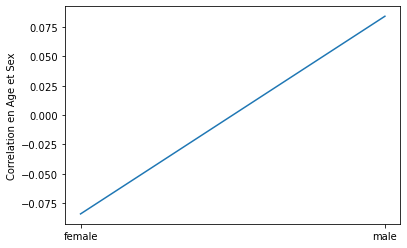

In [21]:
# Affichage de la figure de la correlation entre le Sex et l'age
plt.ylabel('Correlation en Age et Sex')
plt.plot(correlation)
plt.show()

we do not have a Heatmap correlation. heatmap allows us to have a correlation matrix to  visualize at once the state of our data


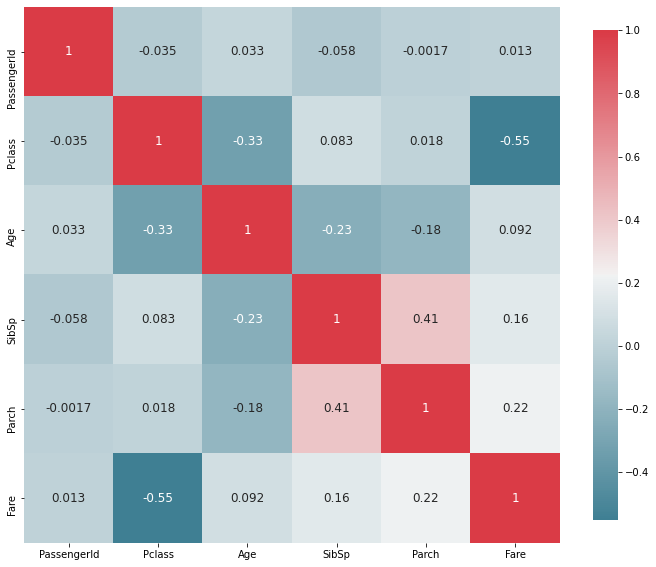

In [9]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(sortie)
print("we do not have a Heatmap correlation. heatmap allows us to have a correlation matrix to  visualize at once the state of our data")    


In [10]:
# Use the groupby function combined with the mean() to view the relation between Pclass and survived 
sortie.groupby(['Pclass','Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  40.896074  0.287500  0.300000  64.684008
       Yes        491.772059  34.784615  0.492647  0.389706  95.608029
2      No         452.123711  33.266947  0.319588  0.144330  19.412328
       Yes        439.080460  26.076166  0.494253  0.643678  22.055700
3      No         453.580645  27.417500  0.672043  0.384409  13.669364
       Yes        394.058824  23.232689  0.436975  0.420168  13.694887

In [11]:
# As a final step try to drop the useless columns such as Names
dropUselessColumns=sortie.drop(columns=['Name']);
print('affiche du fichier apres la suppression des colonnes Ticket  , SibSp , Name et Parch')
dropUselessColumns.head(3)

affiche du fichier apres la suppression des colonnes Ticket  , SibSp , Name et Parch


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S


In [31]:
# creation de la colone title a partir de l'extraction des données de la colonne Nom
sortie['title']= sortie['Name']
remplaceNameByTtile = sortie.drop(columns=['Name']);
print("Affichage du fichier aprés avoir remplacer Name par title")
remplaceNameByTtile.head(2)

Affichage du fichier aprés avoir remplacer Name par title


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,male,28.0,0,0,248740,13.00,B96 B98,S,"Collander, Mr. Erik Gustaf"
1,76,No,3,male,25.0,0,0,348123,7.65,F G73,S,"Moen, Mr. Sigurd Hansen"


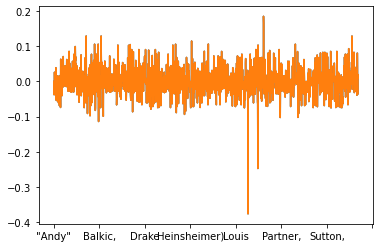

In [35]:
# Affichage de la correlation entre title et Age
correlationTitleAndAge = sortie['title'].str.get_dummies(sep=' ').corrwith(sortie['Age'])
correlationTitleAndAge.plot()
plt.show()

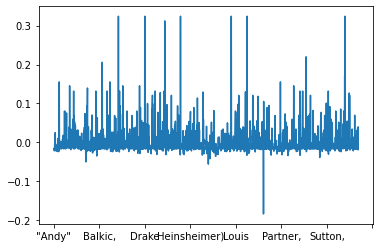

In [36]:
# Affichage de la correlation entre title et Fare
correlationTitleAndFare = sortie['title'].str.get_dummies(sep=' ').corrwith(sortie['Fare'])
correlationTitleAndFare.plot()
plt.show()

In [83]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",
                    "Master" :    "Master"

                    }
# Faire un group By 
dataframeTitle_Dictionary = pd.DataFrame([Title_Dictionary]).groupby('Mrs')
dataframeTitle_Dictionary.all()

,Capt,Col,Major,Dr,Rev,Jonkheer,Don,Sir,Lady,the Countess,Dona,Mme,Mlle,Miss,Ms,Mr,Master
Mrs,,,,,,,,,,,,,,,,,
Mrs,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


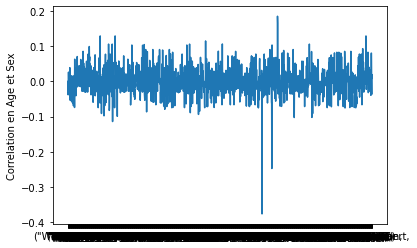

In [100]:
# let's visualize the same correlations using these new titles now.
correlationTitleAndAge=sortie['title'].str.get_dummies(sep=' ').corrwith(sortie['Age'])
plt.ylabel('Correlation en Age et Sex')
plt.plot(correlationTitleAndAge)
plt.show()


Parch
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

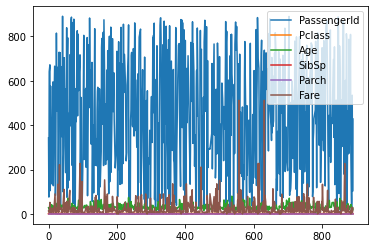

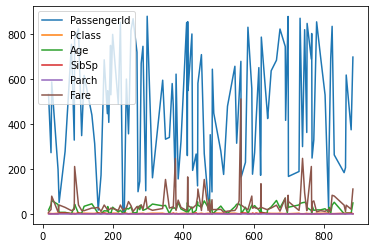

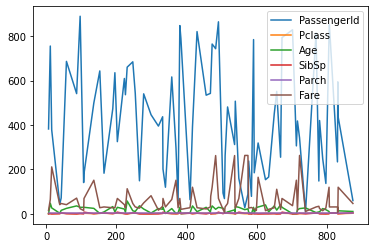

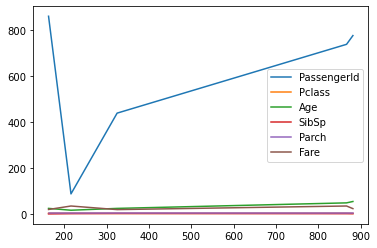

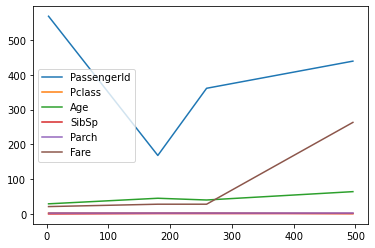

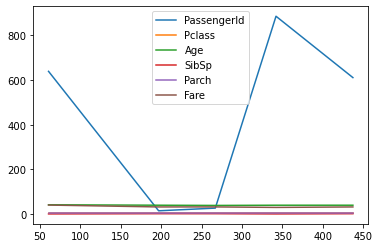

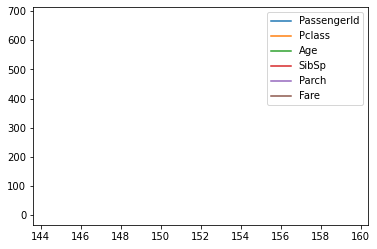

In [118]:
# Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

FamilySize = sortie.groupby('Parch')
# plt.plot(FamilySize)
FamilySize.plot()